In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.pipeline import Pipeline


In [73]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')

# custom color palettes - choose one or mix them 
blue_palatte = sns.color_palette('Blues_r', n_colors=8)
green_palette = sns.color_palette('Greens_r', n_colors=8)
orange_palette = sns.color_palette('Oranges_r', n_colors=8)

# set blue green palette as defaults 
sns.set_palette('viridis')

In [74]:
# load the datasets 
df = pd.read_csv('StressLevelDataset.csv')

In [75]:
print('='*40)
print('Dataset Overview')
print('='*40)

print(f'Datasets shape: {df.shape}')
print(f'Total Records: {df.shape[0]}')
print(f'Total features: {df.shape[1]}')
print('\nColumn Names:')
print(df.columns.tolist())

# display first few rows 
print('\nFirst 5 rows of the datasets:')
df.head()

Dataset Overview
Datasets shape: (1100, 21)
Total Records: 1100
Total features: 21

Column Names:
['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']

First 5 rows of the datasets:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [76]:
# Data quality assessment
print('\n' + '='*40)
print('Data Quality Assessment')
print('='*40)

# check datatypes 
print('\nData Types:')
print(df.dtypes)

# Check for missing values
print('\nMissing Values:')
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print('No missing values found in the datasets!')
else:
    print(missing_values[missing_values>0])

# check for duplicate rows 
duplicates = df.duplicated().sum()
print(f'\nDuplicate Rows: {duplicates}')

# Basics statistics 
print('\nBasics Statistics:')
df.describe()


Data Quality Assessment

Data Types:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

Missing Values:
No missing values found in the datasets!

Duplicate Rows: 0

Basics Statistics:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000



Univariate Analysis


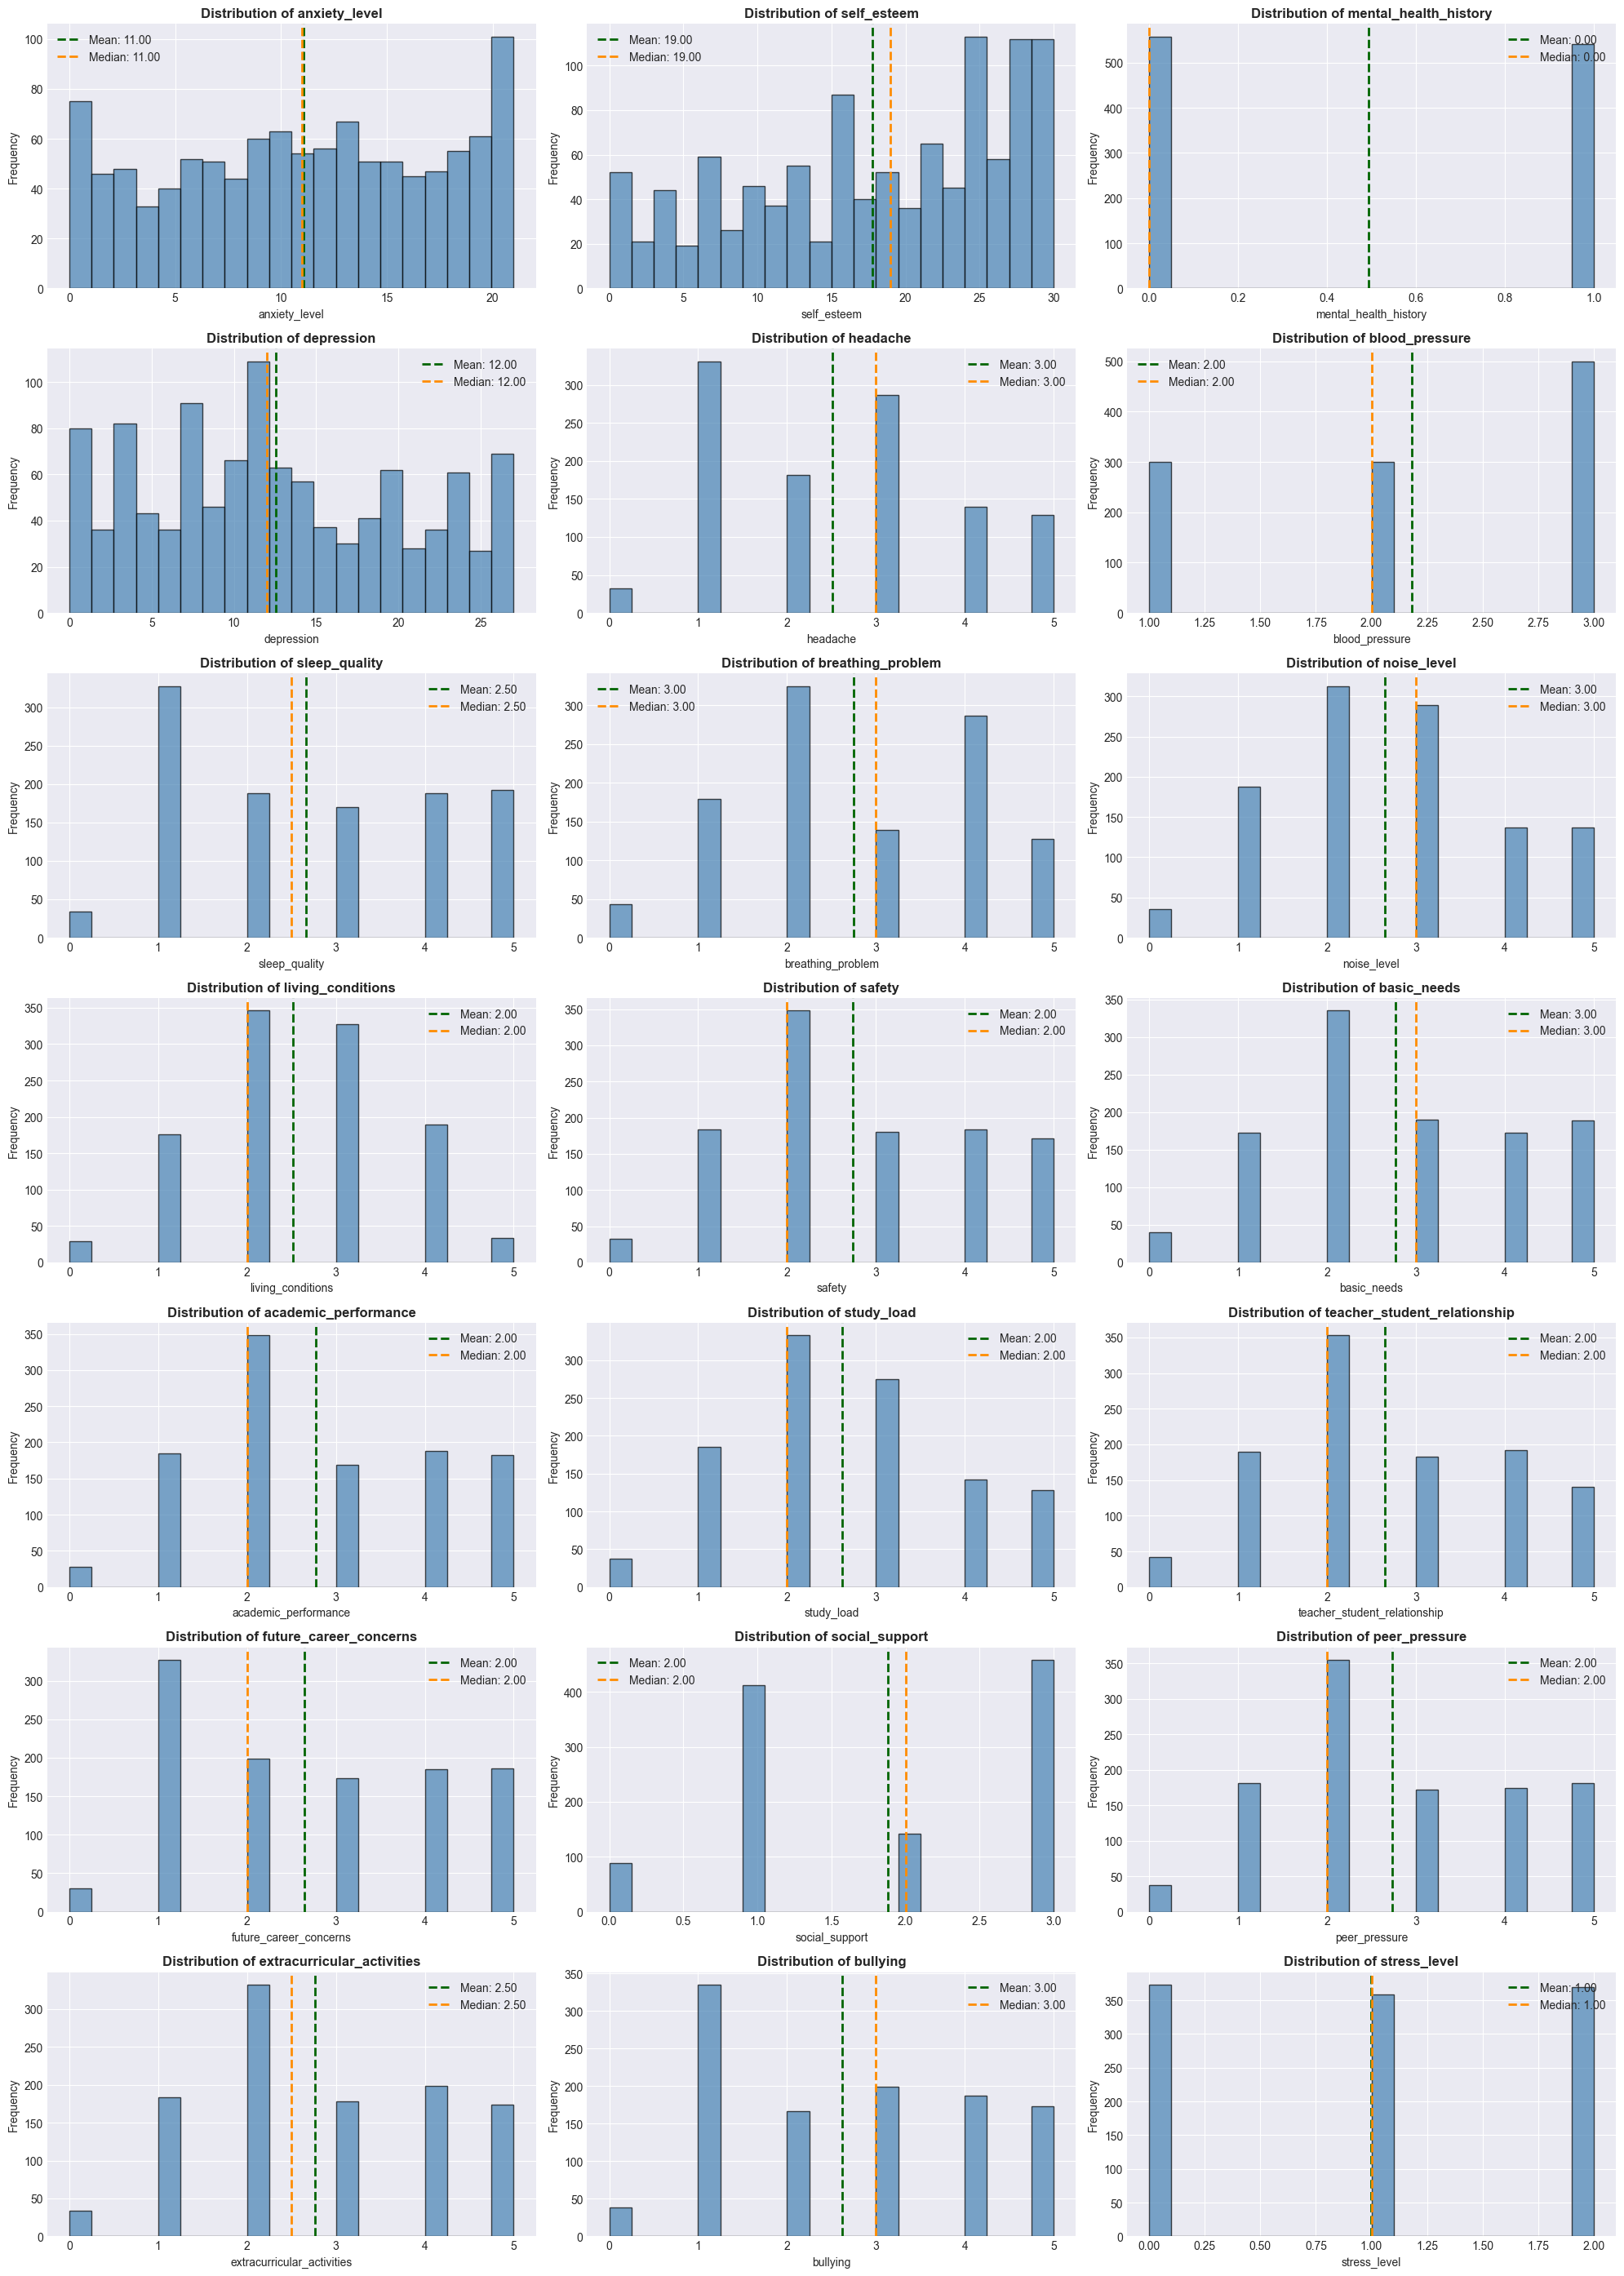


Skewness of Features:
headache                        0.270494
study_load                      0.228964
depression                      0.216638
noise_level                     0.207122
future_career_concerns          0.204276
teacher_student_relationship    0.198016
peer_pressure                   0.194719
safety                          0.188097
academic_performance            0.184316
sleep_quality                   0.177975
bullying                        0.175348
basic_needs                     0.135859
extracurricular_activities      0.135604
mental_health_history           0.029134
living_conditions               0.018794
stress_level                    0.006728
breathing_problem              -0.001625
anxiety_level                  -0.082612
social_support                 -0.180958
blood_pressure                 -0.351186
self_esteem                    -0.396539
dtype: float64


In [77]:
# Univariate Analysis - Distribution of features
print('\n'+'='*40)
print('Univariate Analysis')
print('='*40)

# create subplots for all features 
fig, axes = plt.subplots(7,3,figsize=(20,28))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    # Use different shades of blue for histograms
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {median_val:.2f}')
    axes[idx].axvline(median_val, color='darkorange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    axes[idx].legend()

plt.tight_layout()
plt.show()

# check for skewness 
print('\nSkewness of Features:')
skewness = df.skew()
print(skewness.sort_values(ascending=False))



Target Variable Analysis (stress_level)


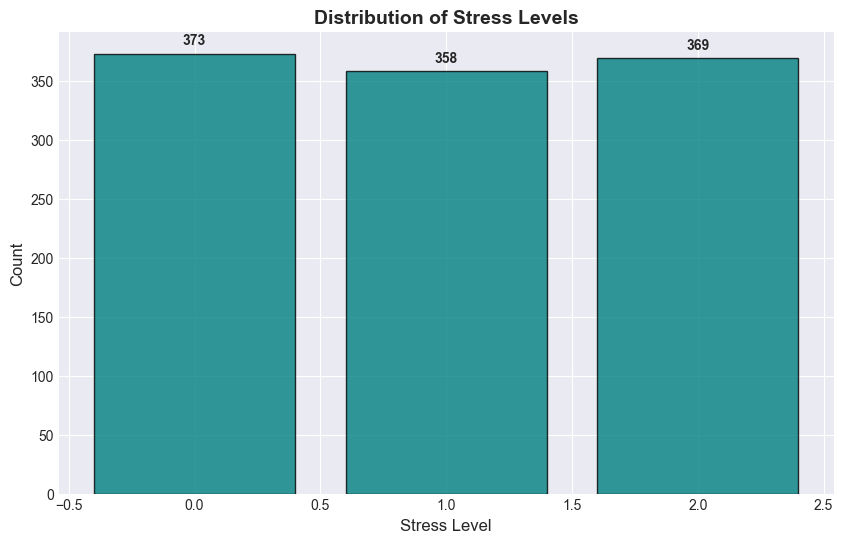


Stress Level Value Counts:
stress_level
0    373
1    358
2    369
Name: count, dtype: int64

Percentage Distribution:
stress_level
0    33.91
1    32.55
2    33.55
Name: count, dtype: float64


In [85]:
# Target variable analysis
print('\n'+'='*40)
print('Target Variable Analysis (stress_level)')
print('='*40)

# Stress level distribution 
plt.figure(figsize=(10,6))
stress_counts = df['stress_level'].value_counts().sort_index()
bars = plt.bar(stress_counts.index, stress_counts.values, edgecolor='black', color='teal', alpha=0.8)
plt.xlabel('Stress Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Stress Levels', fontsize=14, fontweight='bold')

for i, v in enumerate(stress_counts.values):
    plt.text(stress_counts.index[i], v+5, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()

print('\nStress Level Value Counts:')
print(stress_counts)
print('\nPercentage Distribution:')
print((stress_counts/len(df)*100).round(2))

Correlation Analysis


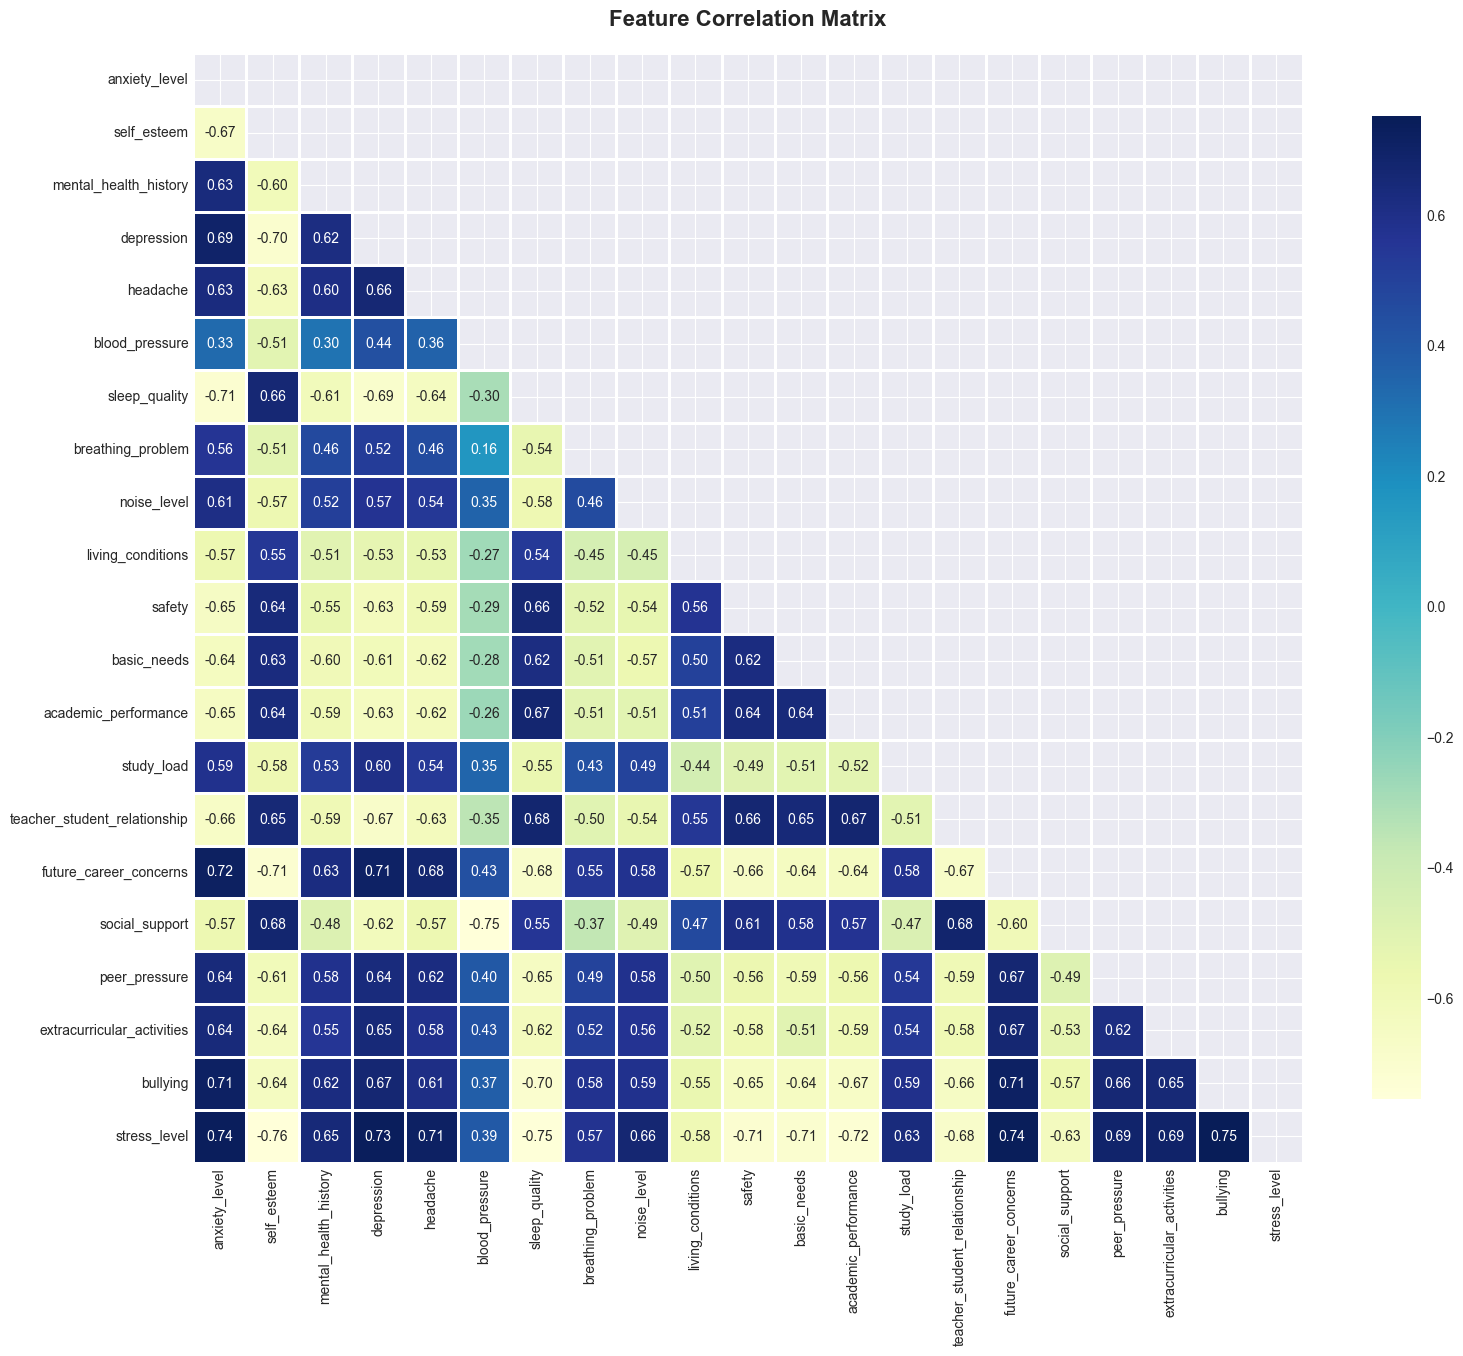


Top 10 Features Correlated with Stress Level:
bullying                      0.751162
future_career_concerns        0.742619
anxiety_level                 0.736795
depression                    0.734379
headache                      0.713484
extracurricular_activities    0.692977
peer_pressure                 0.690684
noise_level                   0.663371
mental_health_history         0.648644
study_load                    0.634156
Name: stress_level, dtype: float64

Bottom 10 Features Correlated with Stress Level:
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64


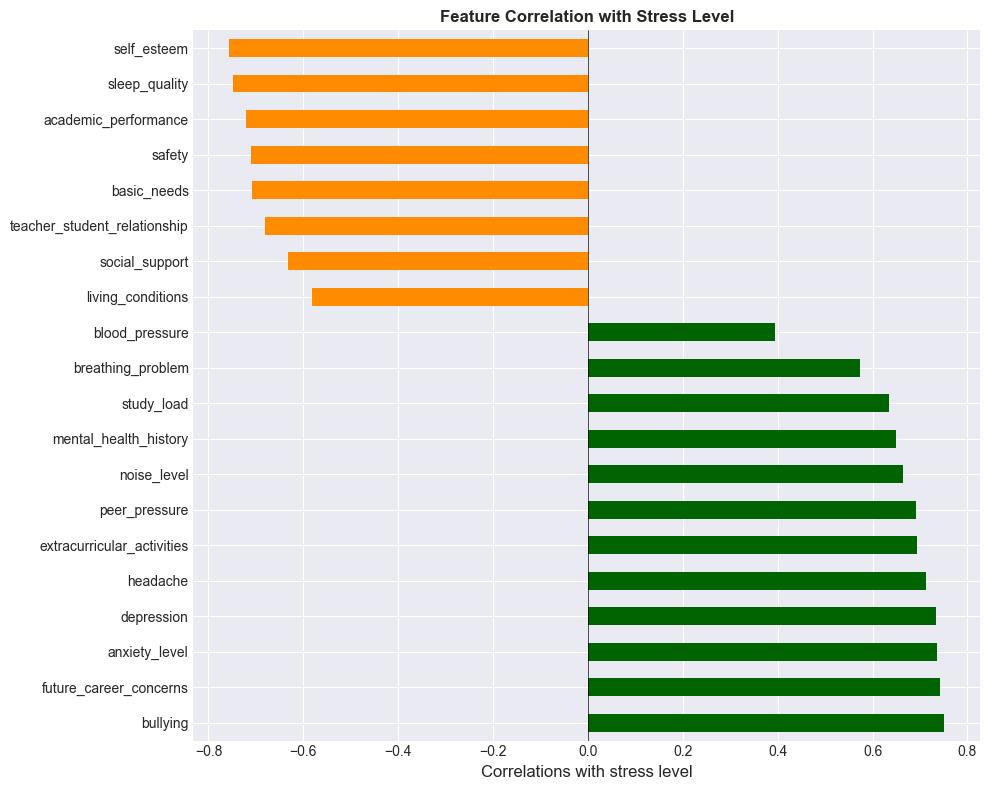

In [108]:
# Correlation Analysis
print('='*40)
print('Correlation Analysis')
print('='*40)

# compute correlation matrix
correlation_matrix = df.corr()

# create a large heatmap for correlation matrix
plt.figure(figsize=(16,14))
mask = np.triu(np.ones_like(correlation_matrix,dtype=bool))

# use a blue green colormap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='YlGnBu', center=0, square=True, linewidths=1, cbar_kws={'shrink':.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlation with stress level
stress_correlations = correlation_matrix['stress_level'].drop('stress_level').sort_values(ascending=False)
print('\nTop 10 Features Correlated with Stress Level:')
print(stress_correlations.head(10))
print('\nBottom 10 Features Correlated with Stress Level:')
print(stress_correlations.tail(10))

# visualize correlations with stress level 
plt.figure(figsize=(10,8))
colors = ['darkgreen' if x > 0 else 'darkorange' for x in stress_correlations]
stress_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlations with stress level', fontsize=12)
plt.title('Feature Correlation with Stress Level', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [115]:
# Multicolinerity detection
print('='*40)
print('Multicollinearity Detection')
print('='*40)

# find highly correlated feature pairs 
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i,j]) > 0.7: # Threshold of 0.7
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i,j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
    print('\nHighly Correlated Feature Pairs (|correlation| > 0.7):')
    print(high_corr_df)
else:
    print('\nNo Highly correlated features found (threshold: 0.7)')

Multicollinearity Detection

Highly Correlated Feature Pairs (|correlation| > 0.7):
                 Feature 1               Feature 2  Correlation
16                bullying            stress_level     0.751162
15  future_career_concerns            stress_level     0.742619
3            anxiety_level            stress_level     0.736795
7               depression            stress_level     0.734379
1            anxiety_level  future_career_concerns     0.717016
8                 headache            stress_level     0.713484
14  future_career_concerns                bullying     0.711278
2            anxiety_level                bullying     0.709982
6               depression  future_career_concerns     0.706561
12             basic_needs            stress_level    -0.708968
11                  safety            stress_level    -0.709602
0            anxiety_level           sleep_quality    -0.710292
4              self_esteem  future_career_concerns    -0.712520
13    academic_perfo

Bivariate Analysis


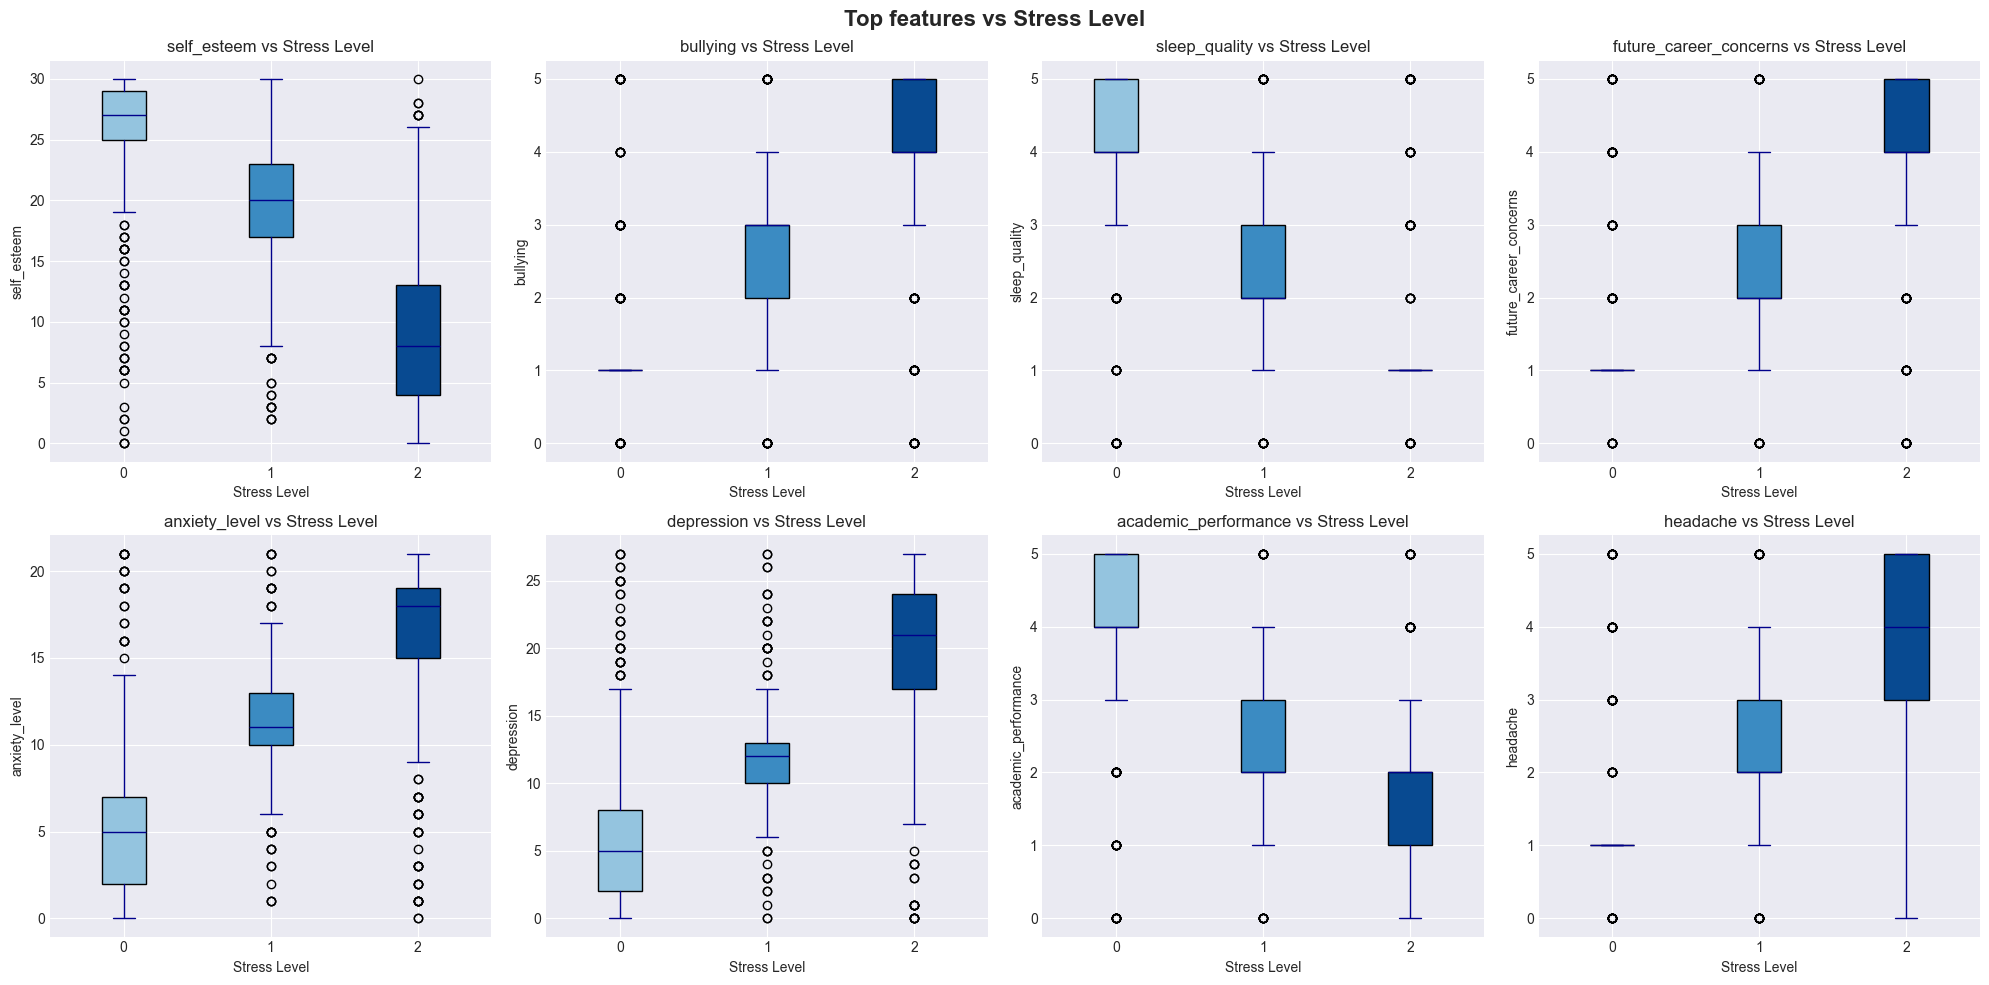

In [130]:
# Bivariate Analysis - Feature vs Stress Level

print('='*40)
print('Bivariate Analysis')
print('='*40)

# select top features based on correlation 
top_features = stress_correlations.abs().nlargest(8).index.tolist()

# create boxplots for top features vs stress level 
fig, axes = plt.subplots(2,4,figsize=(20,10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    # group data by stress level for the current feature 
    data_to_plot = [df[df['stress_level'] == level][feature].values 
                    for level in sorted(df['stress_level'].unique())]
    
    # Create box plot with custom colors
    bp = axes[idx].boxplot(data_to_plot, patch_artist=True)

    # color the boxes with gradient of blues 
    colors = plt.cm.Blues(np.linspace(0.4,0.9, len(bp['boxes'])))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # customize othe elements 
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color='darkblue')

    axes[idx].set_title(f'{feature} vs Stress Level', fontsize=12)
    axes[idx].set_xlabel('Stress Level')
    axes[idx].set_ylabel(feature)
    axes[idx].set_xticklabels(sorted(df['stress_level'].unique()))

plt.suptitle('Top features vs Stress Level', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


Outlier Detection

Outlier Summary (IQR Method):
                   count  percentage
noise_level        173.0   15.727273
study_load         165.0   15.000000
living_conditions   62.0    5.636364


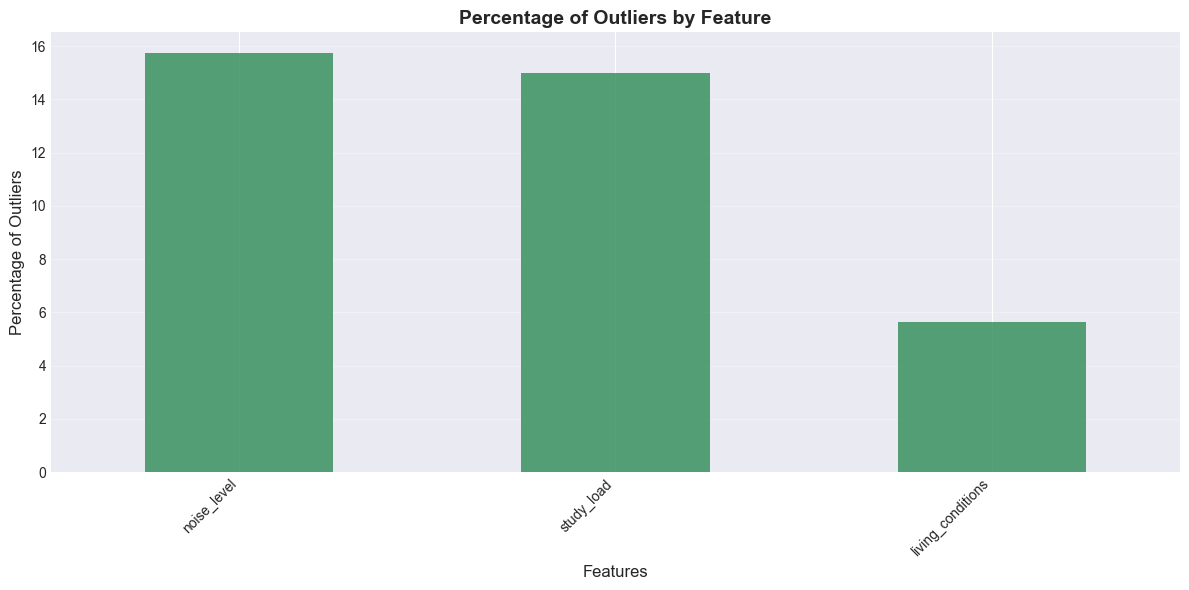

In [138]:
# Detect outliers using IQR method
print('\n'+'='*40)
print('Outlier Detection')
print('='*40)

# Detect outliers using IQR method 
outlier_summary = {}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3- Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower_bound)|(df[col] > upper_bound)][col]
    outlier_summary[col] = {
        'count': len(outliers), 
        'percentage': (len(outliers) / len(df))*100
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df.sort_values('count', ascending=False)
print('\nOutlier Summary (IQR Method):')
print(outlier_df[outlier_df['count']>0])

# Visualize outliers 
plt.figure(figsize=(12,6))
outlier_df[outlier_df['count']>0]['percentage'].plot(kind='bar', color='seagreen', alpha=0.8)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage of Outliers', fontsize=12)
plt.title('Percentage of Outliers by Feature', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Feature Importance Analysis

Mutual Information Scores:
                         Feature  MI Score
5                 blood_pressure  0.769564
3                     depression  0.688627
0                  anxiety_level  0.673906
15        future_career_concerns  0.668853
6                  sleep_quality  0.667300
1                    self_esteem  0.653680
19                      bullying  0.644296
4                       headache  0.583778
18    extracurricular_activities  0.550357
16                social_support  0.535411
11                   basic_needs  0.533557
14  teacher_student_relationship  0.527248
12          academic_performance  0.526880
10                        safety  0.476485
17                 peer_pressure  0.470469
13                    study_load  0.412123
8                    noise_level  0.409404
7              breathing_problem  0.376800
9              living_conditions  0.373208
2          mental_health_history  0.264610


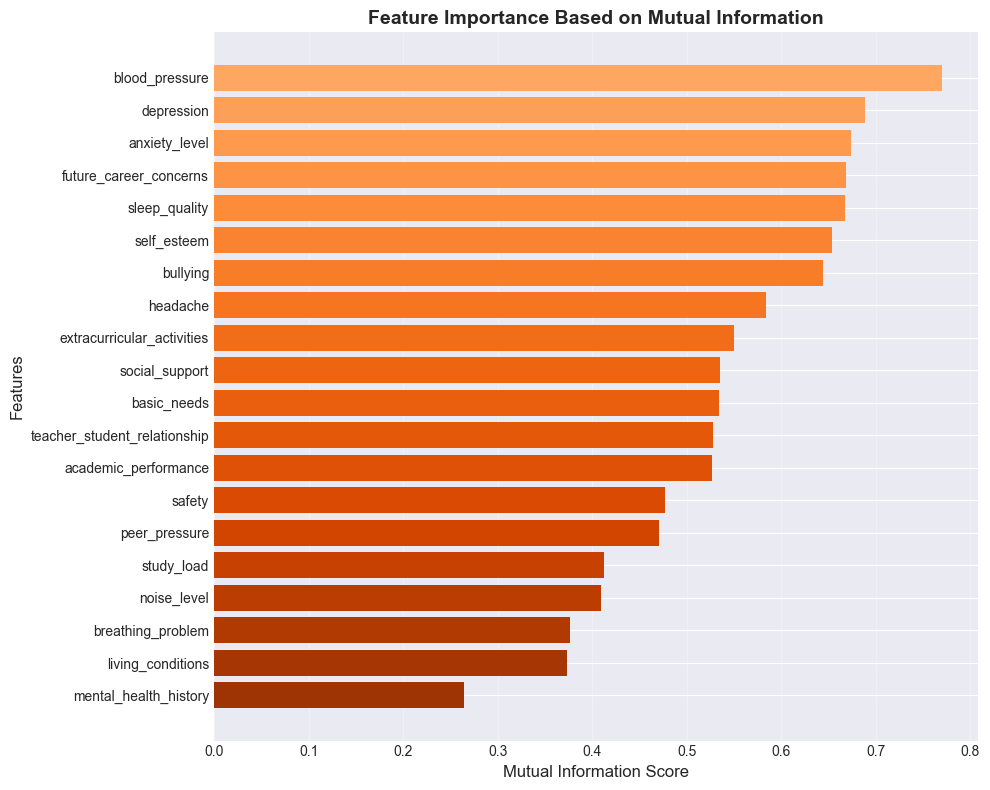

In [154]:
# Feature Importance using Mutual Information 
print('='*40)
print('Feature Importance Analysis')
print('='*40)

# Calculate mutual information scores
X = df.drop('stress_level', axis=1)
y = df['stress_level']

mi_scores = mutual_info_regression(X,y,random_state=2)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns, 
    'MI Score': mi_scores
}).sort_values('MI Score', ascending=False)

print('\nMutual Information Scores:')
print(mi_scores_df)

# Visualize mutual information scores 
plt.figure(figsize=(10,8))

# create gradient colors from orange to dark orange 
colors = plt.cm.Oranges(np.linspace(0.4,0.9, len(mi_scores_df)))
plt.barh(mi_scores_df['Feature'], mi_scores_df['MI Score'], color=colors)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance Based on Mutual Information', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Dimensionality Reduction (PCA)


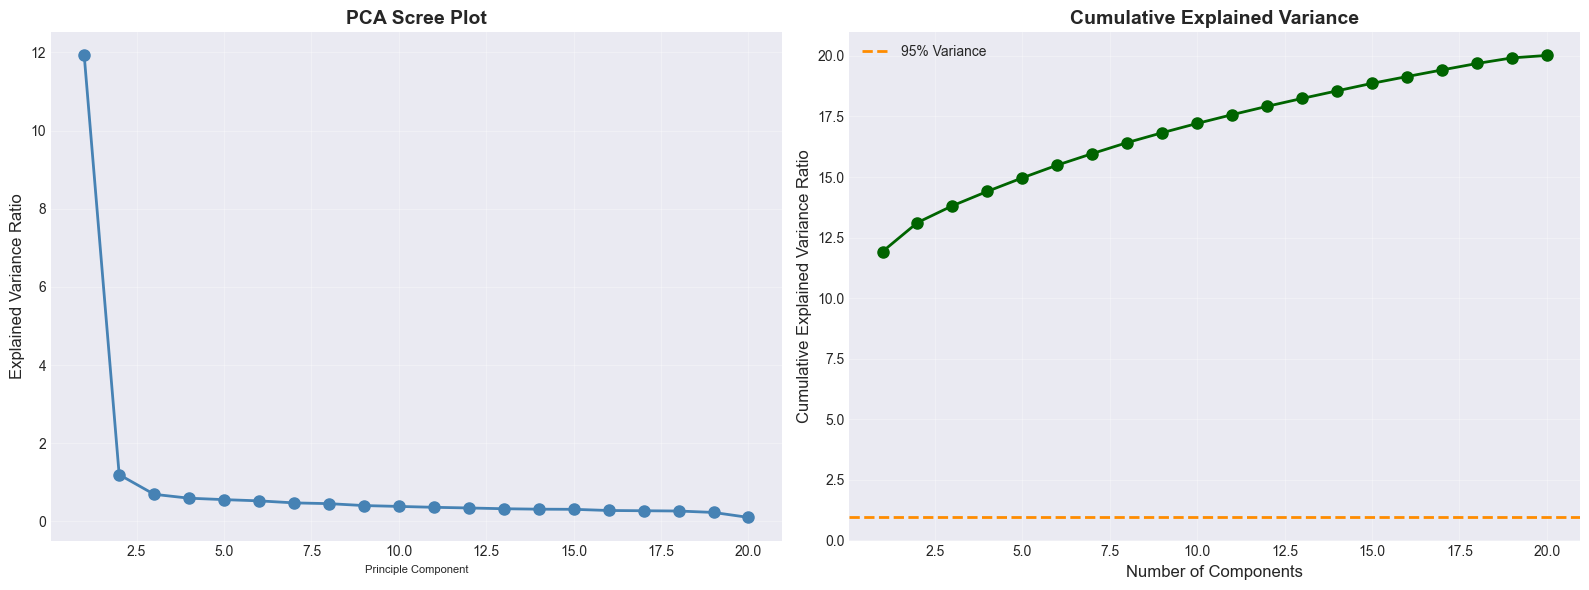


Number of Components needed for 95% variance: 1


In [ ]:
# Dimensionality Reduction Visualization

print('='*40)
print('Dimensionality Reduction (PCA)')
print('='*40)

# Standardize features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA 
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# EXplained variance ratio 
explained_variance_ratio = pca.explained_variance_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

# Scree plot
ax1.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'o-', color='steelblue', markersize=8, linewidth=2)
ax1.set_xlabel('Principle Component', fontsize=8)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('PCA Scree Plot', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance 
ax2.plot(range(1,len(cumulative_variance_ratio)+1),cumulative_variance_ratio, 'o-', color='darkgreen', markersize=8, linewidth=2)
ax2.axhline(y=0.95, color='darkorange', linestyle='--', linewidth=2, label='95% Variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12)
ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Number of Components for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'\nNumber of Components needed for 95% variance: {n_components_95}')



In [195]:
df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [ ]:
# Statistical Tests
print('='*40)
print('Statistical Tests')
print('='*40)

# Tests for normality of stress level
statistic, p_value = stats.normaltest(df['stress_level'])
print('\nNormality Test for Stress Level')
print(f'Statistics: {statistic:.4f}')
print(f'P-value: {p_value:.4f}')
print(f'Is normally distributed? {"Yes" if p_value > 0.5 else "No"}')

# ANOVA test for categorical-like features vs stress level
print('\nANOVA Tests (Feature groups by stress level):')
for feature in ['anxiety_level', 'depression', 'academic_performance']:
    groups = [group[feature].values for name, group in df.groupby ('stress_level')]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f'\n{feature}:')
    print(f'F-statistic: {f_stat:.4f}')
    print(f'P-value: {p_val:.4f}')
    print(f'Significant difference? {"Yes" if p_val < 0.05 else "No"}')


Statistical Tests

Normality Test for Stress Level
Statistics: 7361.7179
P-value: 0.0000
Is normally distributed? No

ANOVA Tests (Feature groups by stress level):

anxiety_level:
F-statistic: 655.4532
P-value: 0.0000
Significant difference? Yes

depression:
F-statistic: 652.6293
P-value: 0.0000
Significant difference? Yes

academic_performance:
F-statistic: 639.2229
P-value: 0.0000
Significant difference? Yes


In [245]:
X = df.iloc[:, :20]
y = df.iloc[:,-1]

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [266]:
X_pca

array([[-0.5128217 , -1.34771076, -0.18979127, ...,  0.40715387,
         0.4368812 , -0.67088777],
       [ 4.54601295,  0.18774576,  0.14540091, ..., -0.69772247,
        -0.10372535,  0.12586979],
       [-0.10386227, -1.27418454, -0.50792134, ...,  0.43852335,
         0.2704343 , -0.61162564],
       ...,
       [-4.35019103,  0.28030218,  0.12501775, ..., -0.1043738 ,
        -0.16721422,  0.27869528],
       [ 4.96241942,  0.23100324, -0.02032305, ...,  0.21259892,
        -0.65139818,  0.44834746],
       [ 2.4790487 ,  0.55377094,  0.71770239, ..., -0.18086645,
        -0.31368504, -0.50716339]])

In [267]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    
    
])

X_train_trf = pipeline.fit_transform(X_train)

df_pca = pd.DataFrame(X_train_trf, columns=['PC1', 'PC2'])

In [270]:
target = y_train

In [276]:
import plotly.express as px

# 3D interactive scatter plot
fig = px.scatter_3d(
    df_pca,
    x="PC1",
    y="PC2",
    z=y_train,          # put target on z-axis
    color=y_train,      # color by target class
    symbol=y_train,     # different markers per class
    title="3D PCA Scatter Plot with target"
)

fig.update_traces(marker=dict(size=6, opacity=0.7))
fig.show()

In [264]:
y_train.shape


(880,)

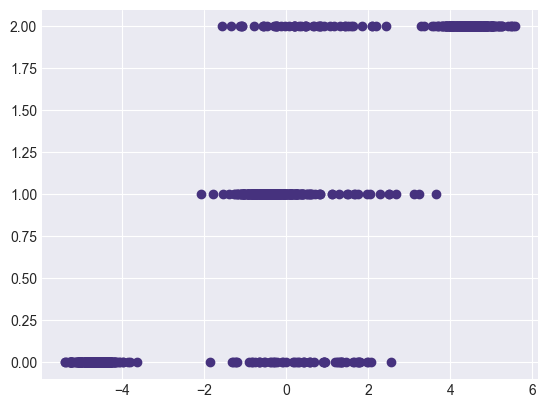

In [259]:
plt.scatter(X_train_trf,y_train)